In [85]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

import os
import json
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [86]:
import folium
from folium.plugins import FastMarkerCluster

In [87]:
#to make the plotly graphs
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

#text mining
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from wordcloud import WordCloud


import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

In [88]:
listings_path = r"C:\Users\34699\OneDrive\Escritorio\bootcamp\Modulo2\Proyecto2\listings.csv"
listings = pd.read_csv(listings_path, index_col="id")

In [89]:
print(listings.head())

                                                    name  host_id  \
id                                                                  
18674  Rental unit in Barcelona · ★4.35 · 3 bedrooms ...    71615   
23197  Rental unit in Sant Adria de Besos · ★4.77 · 3...    90417   
41952  Rental unit in Barcelona · ★4.35 · 2 bedrooms ...   183340   
32711  Rental unit in Barcelona · ★4.43 · 2 bedrooms ...   135703   
46153  Rental unit in Barcelona · ★4.20 · 2 bedrooms ...    90417   

              host_name neighbourhood_group  \
id                                            
18674  Mireia And Maria            Eixample   
23197    Etain (Marnie)          Sant Martí   
41952            Teresa              Gràcia   
32711              Nick              Gràcia   
46153    Etain (Marnie)        Ciutat Vella   

                               neighbourhood   latitude  longitude  \
id                                                                   
18674                     la Sagrada Família  

In [90]:
listings_data_path = r"C:\Users\34699\OneDrive\Escritorio\bootcamp\Modulo2\Proyecto2\listings_data.csv"
listings_details = pd.read_csv(listings_data_path, index_col="id", low_memory=False)

In [91]:
print(listings_details.head())

                              listing_url       scrape_id last_scraped  \
id                                                                       
18674  https://www.airbnb.com/rooms/18674  20230610001920   2023-06-10   
23197  https://www.airbnb.com/rooms/23197  20230610001920   2023-06-10   
32711  https://www.airbnb.com/rooms/32711  20230610001920   2023-06-10   
41952  https://www.airbnb.com/rooms/41952  20230610001920   2023-06-10   
46153  https://www.airbnb.com/rooms/46153  20230610001920   2023-06-10   

            source                                               name  \
id                                                                      
18674  city scrape  Rental unit in Barcelona · ★4.35 · 3 bedrooms ...   
23197  city scrape  Rental unit in Sant Adria de Besos · ★4.77 · 3...   
32711  city scrape  Rental unit in Barcelona · ★4.43 · 2 bedrooms ...   
41952  city scrape  Rental unit in Barcelona · ★4.35 · 2 bedrooms ...   
46153  city scrape  Rental unit in Barcelon

In [92]:
calendar_data_path = r"C:\Users\34699\OneDrive\Escritorio\bootcamp\Modulo2\Proyecto2\calendar_data.csv"
calendar = pd.read_csv(
    calendar_data_path,
    parse_dates=['date'],
    index_col=['listing_id'],
    dtype={'price': 'str'}
)

In [93]:
calendar['price'] = calendar['price'].replace('[\$,]', '', regex=True).astype(float)
print(calendar.head())

                 date available  price adjusted_price  minimum_nights  \
listing_id                                                              
18674      2023-06-10         f  210.0        $210.00             4.0   
18674      2023-06-11         f  210.0        $210.00             4.0   
18674      2023-06-12         f  210.0        $210.00             4.0   
18674      2023-06-13         f  210.0        $210.00             4.0   
18674      2023-06-14         f  210.0        $210.00             2.0   

            maximum_nights  
listing_id                  
18674               1125.0  
18674               1125.0  
18674               1125.0  
18674               1125.0  
18674               1125.0  


In [94]:
reviews_data_path = r"C:\Users\34699\OneDrive\Escritorio\bootcamp\Modulo2\Proyecto2\reviews_data.csv"
reviews_details = pd.read_csv(reviews_data_path, parse_dates=['date'])

In [95]:
print(reviews_details.head())

   listing_id         id       date  reviewer_id reviewer_name  \
0       18674    4808211 2013-05-27      4841196         Caron   
1       18674   10660311 2014-03-02     11600277   Juan Carlos   
2       18674   41087522 2015-08-04     35231385        Shlomi   
3       18674   81000756 2016-06-20     23223644         Joost   
4       18674  278588962 2018-06-18      4756672        Marius   

                                            comments  
0  Great location. Clean, spacious flat. Would re...  
1  Mi mejor recomendación para este departamento....  
2  Big apartment, well equipped.\r<br/>Very good ...  
3  The Check in was fast and flexible. The price ...  
4  Great location and enough space in the apartme...  


In [96]:
neighbourhoods_path = r"C:\Users\34699\OneDrive\Escritorio\bootcamp\Modulo2\Proyecto2\neighbourhoods.csv"
neighbourhoods = pd.read_csv(neighbourhoods_path)

In [97]:
print(neighbourhoods.head())

  neighbourhood_group                          neighbourhood
0        Ciutat Vella                         el Barri Gòtic
1        Ciutat Vella                               el Raval
2        Ciutat Vella                         la Barceloneta
3        Ciutat Vella  Sant Pere, Santa Caterina i la Ribera
4            Eixample                          el Fort Pienc


In [98]:
reviews_path = r"C:\Users\34699\OneDrive\Escritorio\bootcamp\Modulo2\Proyecto2\reviews.csv"
reviews = pd.read_csv(reviews_path)

In [99]:
print(reviews.head())

   listing_id        date
0       18674  2013-05-27
1       18674  2014-03-02
2       41952  2012-05-14
3       41952  2012-05-19
4       71520  2011-06-23


In [100]:
target_columns = [
    "property_type", "accommodates", "first_review", "review_scores_value", 
    "review_scores_cleanliness", "review_scores_location", "review_scores_accuracy", 
    "review_scores_communication", "review_scores_checkin", "review_scores_rating", 
    "maximum_nights", "listing_url", "host_is_superhost", "host_about", 
    "host_response_time", "host_response_rate"
]

# Fusionar los DataFrames listings y listings_details en base a la columna 'id'
listings = pd.merge(listings, listings_details[target_columns], on='id', how='left')

# Mostrar información del DataFrame listings para verificar la fusión y los tipos de datos
print(listings.info())

<class 'pandas.core.frame.DataFrame'>
Index: 17230 entries, 18674 to 909387630966968007
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            17230 non-null  object 
 1   host_id                         17230 non-null  int64  
 2   host_name                       17228 non-null  object 
 3   neighbourhood_group             17230 non-null  object 
 4   neighbourhood                   17230 non-null  object 
 5   latitude                        17230 non-null  float64
 6   longitude                       17230 non-null  float64
 7   room_type                       17230 non-null  object 
 8   price                           17230 non-null  int64  
 9   minimum_nights                  17230 non-null  int64  
 10  number_of_reviews               17230 non-null  int64  
 11  last_review                     13198 non-null  object 
 12  reviews_per_month   

In [101]:
listings.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,review_scores_accuracy,review_scores_communication,review_scores_checkin,review_scores_rating,maximum_nights,listing_url,host_is_superhost,host_about,host_response_time,host_response_rate
id,,,,,,,,,,,,,,,,,,,,,
18674,Rental unit in Barcelona · ★4.35 · 3 bedrooms ...,71615,Mireia And Maria,Eixample,la Sagrada Família,41.405560,2.172620,Entire home/apt,210,1,...,4.44,4.71,4.79,4.35,1125,https://www.airbnb.com/rooms/18674,f,"We are Mireia (43) & Maria (45), two multiling...",within an hour,95%
23197,Rental unit in Sant Adria de Besos · ★4.77 · 3...,90417,Etain (Marnie),Sant Martí,el Besòs i el Maresme,41.412907,2.220633,Entire home/apt,250,4,...,4.93,4.99,4.94,4.77,300,https://www.airbnb.com/rooms/23197,t,"Hi there, I'm marnie from Australia, though I ...",within an hour,100%
41952,Rental unit in Barcelona · ★4.35 · 2 bedrooms ...,183340,Teresa,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.405680,2.169430,Entire home/apt,172,3,...,4.44,4.49,4.52,4.35,365,https://www.airbnb.com/rooms/41952,f,My name is Teresa Davi. I was born and raised ...,within a few hours,97%
32711,Rental unit in Barcelona · ★4.43 · 2 bedrooms ...,135703,Nick,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.405660,2.170150,Entire home/apt,186,2,...,4.43,4.85,4.86,4.43,31,https://www.airbnb.com/rooms/32711,t,I'm Nick your English host in Barcelona.\r\n\r...,within an hour,100%
46153,Rental unit in Barcelona · ★4.20 · 2 bedrooms ...,90417,Etain (Marnie),Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",41.389560,2.177590,Entire home/apt,63,31,...,4.20,4.40,4.20,4.20,186,https://www.airbnb.com/rooms/46153,t,"Hi there, I'm marnie from Australia, though I ...",within an hour,100%


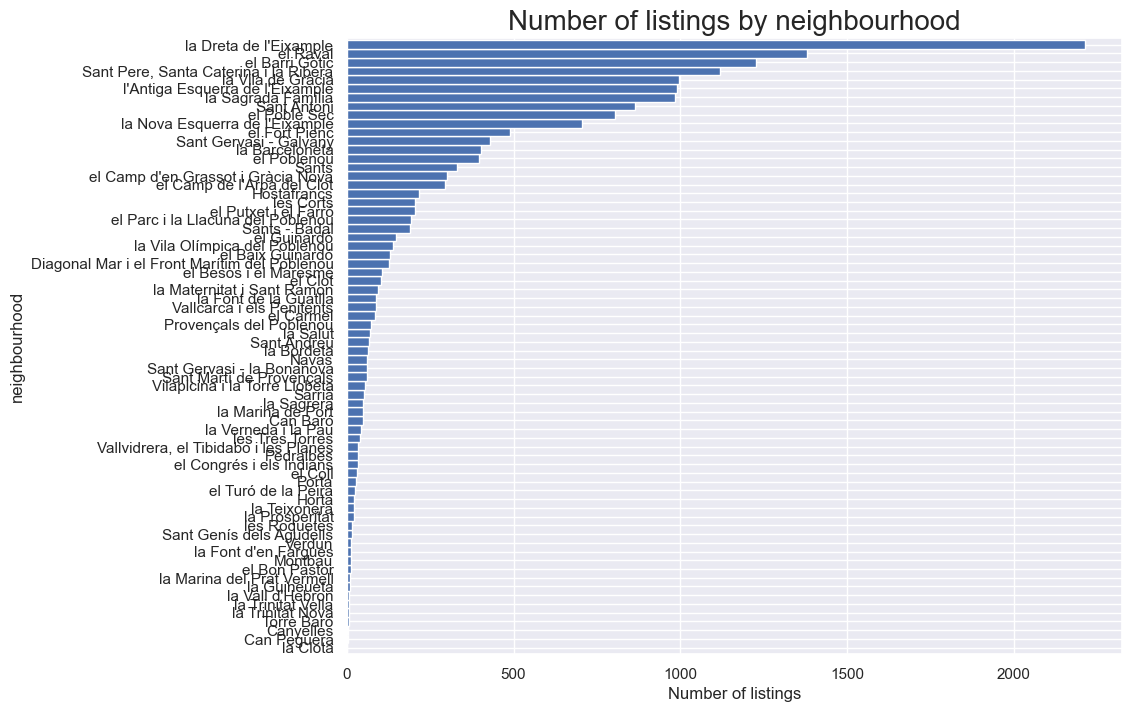

In [102]:
desc_1 = listings['neighbourhood'].value_counts().sort_values(ascending=True)


desc_1.plot.barh(figsize=(10, 8), color='b', width=1)
plt.title("Number of listings by neighbourhood", fontsize=20)
plt.xlabel('Number of listings', fontsize=12)
plt.show()

In [103]:
lats2018 = listings['latitude'].tolist()
lons2018 = listings['longitude'].tolist()

locations = list(zip(lats2018, lons2018))

map1 = folium.Map(location=[39.6953, 3.0176], zoom_start=10)

FastMarkerCluster(data=locations).add_to(map1)

map1.save("map1.html")
map1

In [104]:
# Obtener los índices únicos de calendar (que son los listing_id)
calendar_listing_ids = calendar.index.unique()

# Obtener los índices únicos de listings
listings_ids = listings.index

# Identificar listing_id en calendar que no están en listings
missing_ids = calendar_listing_ids[~calendar_listing_ids.isin(listings_ids)]

print("Número de listing_id en calendar que no están en listings:", len(missing_ids))
print("Listado de listing_id faltantes:")
print(missing_ids)

Número de listing_id en calendar que no están en listings: 0
Listado de listing_id faltantes:
Index([], dtype='int64', name='listing_id')


In [105]:
df1=calendar.head(1)

In [106]:
df1

,date,available,price,adjusted_price,minimum_nights,maximum_nights
listing_id,,,,,,
18674,2023-06-10,f,210.0,$210.00,4.0,1125.0


In [107]:
df2 = calendar.loc[calendar.index == 18674]

In [108]:
df2

,date,available,price,adjusted_price,minimum_nights,maximum_nights
listing_id,,,,,,
18674,2023-06-10,f,210.0,$210.00,4.0,1125.0
18674,2023-06-11,f,210.0,$210.00,4.0,1125.0
18674,2023-06-12,f,210.0,$210.00,4.0,1125.0
18674,2023-06-13,f,210.0,$210.00,4.0,1125.0
18674,2023-06-14,f,210.0,$210.00,2.0,1125.0
...,...,...,...,...,...,...
18674,2024-06-04,f,256.0,$256.00,1.0,1125.0
18674,2024-06-05,f,256.0,$256.00,1.0,1125.0
18674,2024-06-06,f,256.0,$256.00,1.0,1125.0


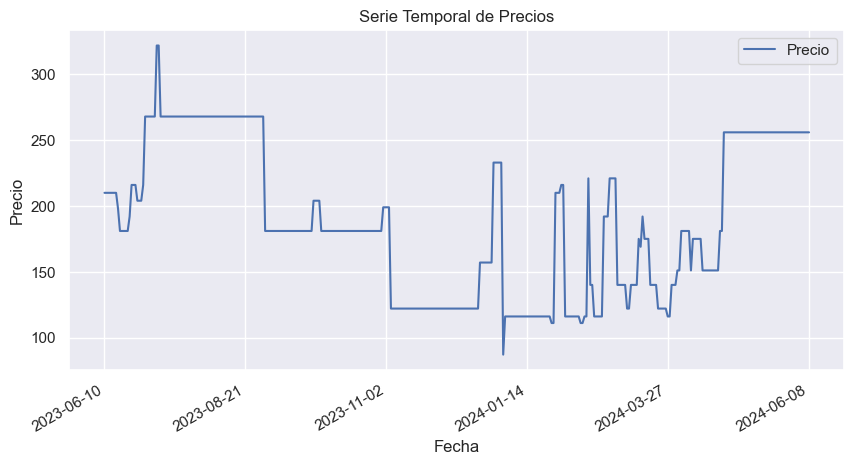

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asegúrate de que la columna 'date' esté en el formato de fecha
df2['date'] = pd.to_datetime(df2['date'])

# Ordena el DataFrame por la columna 'date'
df2 = df2.sort_values(by='date')

# Establece la columna 'date' como índice (opcional, pero útil para series temporales)
df2.set_index('date', inplace=True)

plt.figure(figsize=(10, 5))
plt.plot(df2.index, df2['price'], label='Precio')

# Configurar etiquetas en los ejes
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.title('Serie Temporal de Precios')
plt.legend()
plt.grid(True)

# Ajustar las etiquetas del eje x
plt.xticks(pd.date_range(start=df2.index.min(), end=df2.index.max(), periods=6))

# Rotar las etiquetas del eje x para mejor legibilidad
plt.gcf().autofmt_xdate()

# Mostrar el gráfico
plt.show()

In [110]:
calendar['date'] = pd.to_datetime(calendar['date'])

filtered_calendar = calendar[(calendar['date'].dt.year == 2024) & (calendar['minimum_nights'] <= 5)]

print(filtered_calendar.head())


                 date available  price adjusted_price  minimum_nights  \
listing_id                                                              
18674      2024-01-01         t  233.0        $233.00             2.0   
18674      2024-01-02         t   87.0         $87.00             2.0   
18674      2024-01-03         t  116.0        $116.00             2.0   
18674      2024-01-04         f  116.0        $116.00             2.0   
18674      2024-01-05         f  116.0        $116.00             2.0   

            maximum_nights  
listing_id                  
18674               1125.0  
18674               1125.0  
18674               1125.0  
18674               1125.0  
18674               1125.0  


In [111]:
df2 = calendar.loc[calendar.index == 21120338]
df2

,date,available,price,adjusted_price,minimum_nights,maximum_nights
listing_id,,,,,,


In [112]:
df=pd.read_csv(r"C:\Users\34699\OneDrive\Escritorio\bootcamp\Modulo2\Proyecto2\calendar_data.csv")

In [113]:

def check_price_variation(group):
    return group['price'].nunique() > 1

In [114]:
listing_with_variation = df.groupby('listing_id').apply(check_price_variation)

C:\Users\34699\AppData\Local\Temp\ipykernel_35136\871089580.py:1: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [115]:
listing_with_variation = listing_with_variation[listing_with_variation].index.tolist() 
listing_with_variation

[18674,
 23197,
 32711,
 34981,
 40983,
 41952,
 46153,
 49968,
 68547,
 71520,
 71553,
 71736,
 72436,
 72793,
 72794,
 73683,
 75003,
 75411,
 80004,
 89756,
 107437,
 110041,
 112538,
 117010,
 118228,
 128463,
 136670,
 138055,
 162091,
 163536,
 171646,
 171816,
 174382,
 177502,
 188267,
 196021,
 196196,
 197267,
 198958,
 206122,
 206167,
 209673,
 214970,
 223096,
 234375,
 238703,
 241614,
 242335,
 252232,
 253030,
 255195,
 256677,
 256982,
 264125,
 267816,
 268017,
 268022,
 269467,
 272282,
 273229,
 273932,
 274156,
 274221,
 275336,
 275346,
 275350,
 276527,
 283231,
 290535,
 290592,
 295200,
 315769,
 320506,
 330766,
 330957,
 331026,
 333190,
 335861,
 337755,
 342641,
 343861,
 343864,
 343866,
 351395,
 357576,
 359841,
 364030,
 365911,
 370665,
 377161,
 379868,
 384063,
 384155,
 384464,
 385049,
 393717,
 399772,
 408599,
 412649,
 417239,
 424137,
 424294,
 425639,
 431331,
 432482,
 437886,
 439057,
 440427,
 443110,
 443222,
 443909,
 449854,
 451758,
 45

In [116]:
len(listing_with_variation)

11899

In [117]:
reservations = calendar[calendar['available'] == 'f']

reservations['date'] = pd.to_datetime(reservations['date'])


reservations['year_month'] = reservations['date'].dt.to_period('M')


visits_per_month = reservations.groupby(['listing_id', 'year_month']).size().reset_index(name='num_visits')

print(visits_per_month.head())

   listing_id year_month  num_visits
0       18674    2023-06          21
1       18674    2023-07          31
2       18674    2023-08          17
3       18674    2023-09          30
4       18674    2023-10          31
